<p><a name="sections"></a></p>


# Data Exploration
</a><br>
- <a href="#glance">First Glance at the Data</a><br>
- <a href="#processing">Data Processing</a><br>
    - <a href="#domain">1.Domain Knowledge Processing</a><br>
    - <a href="#outliers">2.Handling Outliers</a><br>
    - <a href="#missing">3.Missing Values</a><br>
    - <a href="#transform">4.Feature Transformation </a><br>
    - <a href="#numeric">5.Numeric Feature Processing </a><br>
    - <a href="#categorical">5.Categorical Feature Processing </a><br>

</a><br>
- **Understand the problem**.  We'll first look at the data and each variable about their meaning and importance for this problem.
- **Univariable study**. We'll just focus on the dependent variable ('SalePrice') and use domain knowledge to handle it.
- **Multivariate study**. We'll try to understand how the dependent variable and independent variables relate.
- **Basic cleaning**. We'll clean the dataset and handle the missing data, outliers and both numeric and categorical variables.
- **Test assumptions**. We'll check if our data meets the assumptions required by most multivariate techniques.
- **Function**. The findings in this data exploration will be summarized in a data processing function for modeling use.
</a><br>
### Links:
- **Comprehensive data exploration with Python** https://www.kaggle.com/wordsforthewise/eda-with-python
- **Dataset 2007-2015 with more kernels** https://www.kaggle.com/wendykan/lending-club-loan-data


In [9]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = 50

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib

%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression 
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

<p><a name="glance"></a></p>

## First Glance at the Data 

In [2]:
# Importing data 

df_raw_accepted = pd.read_csv('accepted_2007_to_2016.csv')
df_raw_rejected = pd.read_csv('rejected_2007_to_2016.csv')

# df_raw_test = pd.read_csv('test.csv',index_col=0)
# df_raw = pd.concat([df_raw, df_raw_test], sort = False) 

In [7]:
df_raw_accepted.shape

(1321847, 110)

In [8]:
df_raw_rejected.shape

(11079386, 9)

In [14]:
#may want to sample according ratio  
#smote unbalance  

df_raw_accepted.sample(2000).to_csv('sample_accepted.csv')
df_raw_rejected.sample(2000).to_csv('sample_rejected.csv')


In [15]:
sample_accepted = pd.read_csv('sample_accepted.csv')
sample_rejected = pd.read_csv('sample_rejected.csv')

In [9]:
df_raw.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321843e+06,1.321847e+06,1.321818e+06,1.321817e+06,662677.000000,219977.000000,1.321818e+06,1.321818e+06,1.321847e+06,1.321081e+06,1.321818e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321847e+06,1.321702e+06,347331.000000,1321847.0,9.300000e+03,9296.000000,1.321818e+06,1.251571e+06,1.251571e+06,455717.000000,455718.000000,455718.000000,455718.000000,443459.000000,4.557180e+05,395615.000000,455718.000000,455718.000000,455718.000000,455695.000000,1.251571e+06,455718.000000,455717.000000,455717.000000,1.271817e+06,1.251559e+06,1.259244e+06,1.258527e+06,1.321702e+06,1.321818e+06,1.214312e+06,1.251570e+06,1.251570e+06,1.251571e+06,1.271817e+06,1.260066e+06,318765.000000,1.139670e+06,448529.000000,1.251571e+06,1.251571e+06,1.251571e+06,1.263257e+06,1.251571e+06,1.251571e+06,1.251571e+06,1.251570e+06,1.251571e+06,1.263257e+06,1.202848e+06,1.251571e+06,1.251571e+06,1.251571e+06,1.251418e+06,1.258823e+06,1.320482e+06,1.321742e+06,1.251571e+06,1.271817e+06,1.271817e+06,1.251571e+06
mean,5.236894e+07,1.474822e+04,1.473922e+04,1.471071e+04,1.317963e+01,4.391420e+02,7.649594e+04,1.887239e+01,3.295938e-01,6.508745e-01,33.894808,68.985699,1.165590e+01,2.150281e-01,1.692801e+04,5.362472e+01,2.502217e+01,6.755341e+03,6.752559e+03,9.250698e+03,9.223675e+03,7.139344e+03,2.040949e+03,5.746782e-01,6.982961e+01,9.962762e+00,2.619154e+03,1.678518e-02,44.411452,1.0,1.115636e+05,18.299421,5.581706e-03,2.411676e+02,1.408428e+05,1.008288,2.831942,0.727941,1.629345,21.271340,3.561987e+04,70.988466,1.373542,2.903416,5777.327646,60.225478,3.276469e+04,0.965009,1.498709,2.166066,4.551259e+00,1.336583e+04,9.547611e+03,6.210613e+01,8.962686e-03,1.561729e+01,1.270696e+02,1.843689e+02,1.344386e+01,8.086934e+00,1.689627e+00,2.461952e+01,39.410779,6.833985e+00,35.460949,5.053049e-01,3.714223e+00,5.778005e+00,4.745405e+00,8.150501e+00,8.514671e+00,8.319066e+00,1.468883e+01,5.731843e+00,1.170843e+01,8.646146e-04,3.875929e-03,9.073636e-02,2.109639e+00,9.406750e+01,4.745467e+01,1.267870e-01,5.661468e-02,1.736727e+05,5.029927e+04,2.148790e+04,4.221178e+04
std,3.218029e+07,8.622143e+03,8.618488e+03,8.625729e+03,4.570613e+00,2.532324e+02,6.911192e+04,7.098519e+01,8.920428e-01,9.576629e-01,21.892426,26.865789,5.469410e+00,6.171629e-01,2.293390e+04,2.404374e+01,1.190355e+01,7.938161e+03,7.935202e+03,8.558047e+03,8.545527e+03,7.236062e+03,2.304573e+03,5.254665e+00,4.927118e+02,8.154662e+01,5.356282e+03,1.467218e-01,22.280051,0.0,5.019977e+04,7.020419,8.119766e-02,8.444208e+03,1.563637e+05,1.188975,3.052855,0.978708,1.657855,26.621487,4.25

In [11]:
print(df_raw_accepted.columns)
print(df_raw_rejected.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=110)
Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')


In [ ]:
print(df_raw_accepted.dtypes)
print(df_raw_rejected.dtypes)

### Question
- **How are the loan amounts/funded amounts distributed?** 
-loan amounts is the listed amount of the loan applied for by the borrower. Funded amounts is the total amount committed to that loan at that point in time. 4 out of 2000 samples, funded amounts is less than loan amount, the others are the same. Funded amounts distribution is right skewed, mean $14,233
- **Are there variations across different loan purposes, loan grades, etc?**
- **Are loans with higher funded amounts harder to be paid-in-full?**


In [29]:
sample_accepted.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,1026.000000,338.000000,1999.000000,1999.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,553.000000,2000.0,15.000000,15.000000,1999.000000,1885.000000,1885.000000,697.000000,697.000000,697.000000,697.000000,678.000000,697.000000,605.000000,697.000000,697.000000,697.000000,697.000000,1885.000000,697.000000,697.000000,697.000000,1921.000000,1885.000000,1903.000000,1902.000000,1999.000000,1999.00000,1821.000000,1885.000000,1885.000000,1885.000000,1921.000000,1904.000000,493.000000,1715.00000,698.000000,1885.000000,1885.000000,1885.000000,1908.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1908.000000,1801.000000,1885.000000,1885.000000,1885.000000,1885.000000,1902.000000,1996.000000,1999.000000,1.885000e+03,1921.000000,1921.000000,1885.000000
mean,6.596060e+05,4.868440e+07,5.232772e+07,14281.062500,14272.300000,14233.221225,13.240790,427.914495,74742.883680,23.116625,0.348174,0.662831,33.823587,68.860947,11.371186,0.214607,16333.052500,53.346923,24.710855,6496.522645,6493.991435,8902.582025,8859.225370,6851.490535,1967.545070,0.430595,83.115840,10.884948,2438.257049,0.014507,45.157324,1.0,135741.333333,20.078000,0.010505,241.893369,138944.439257,1.020086,2.837877,0.668580,1.553802,21.256637,33276.667145,71.001653,1.352941,2.977044,5606.185079,59.909613,32579.807427,1.015782,1.441894,2.166428,4.610099,13796.231300,9831.728324,61.929022,0.017509,38.94097,126.814388,186.152785,12.891777,7.838727,1.743363,24.264181,39.689655,6.51895,35.386819,0.514058,3.674271,5.713528,4.706499,8.119363,8.174536,8.207427,14.641910,5.662069,11.432914,0.001110,0.006897,0.116711,2.121485,93.890875,46.798686,0.129259,0.056028,1.715215e+05,47103.963040,21362.768350,39099.114058
std,3.863856e+05,3.053036e+07,3.249146e+07,8457.788424,8455.418404,8466.839125,4.583033,249.455262,44782.020876,223.339318,0.957994,0.957753,21.746995,27.383986,5.423071,0.560161,21926.581333,24.393981,11.914713,7767.108851,7764.963089,8409.527977,8387.330418,7053.047580,2289.404316,3.882717,557.374313,92.733607,4991.794790,0.123713,22.782339,0.0,87452.620549,8.227558,0.106776,1922.894171,143098.627544,1.148286,3.365793,0.903729,1.596617,26.145410,35390.590678,23.043760,1.526197,2.850094,4922.367353,21.111135,33029.196106,1.605856,2.535919,2.267554,3.170088,16018.838653,16057.321315,28.056877,0.241354,1463.14007,51.793118,97.183085,15.430378,8.095010,2.095938,31.272959,23.315506,5.76606,22.304774,1.28

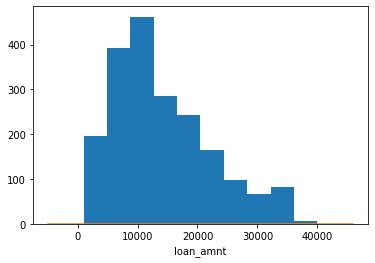

In [39]:
plt.hist(sample_accepted['loan_amnt'],bins=10)


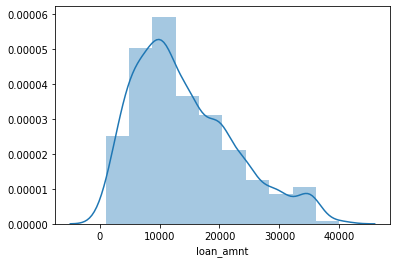

In [45]:
sns.distplot(sample_accepted['loan_amnt'],bins=10)

(array([196., 392., 464., 285., 244., 164.,  98.,  67.,  83.,   7.]),
 array([ 1000.,  4900.,  8800., 12700., 16600., 20500., 24400., 28300.,
        32200., 36100., 40000.]),
 <a list of 10 Patch objects>)

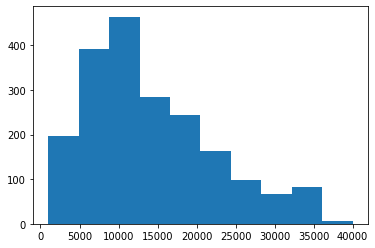

In [18]:
plt.hist(sample_accepted['funded_amnt'])

In [28]:
sample_accepted[sample_accepted['funded_amnt']!=sample_accepted['loan_amnt']]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1386,40002,598033,746489.0,18000.0,11850.0,11521.805080,60 months,16.32,290.19,D,D5,Associatye Insurance Agency,10+ years,OWN,120000.0,Source Verified,Oct-2010,Does not meet the credit policy. Status:Charge...,n,Borrower added on 09/13/10 > This loan will be...,major_purchase,Major Purchase,775xx,TX,2.87,0.0,Aug-1996,5.0,77.0,NaN,4.0,0.0,14514.0,91.9,11.0,f,0.0,0.0,12837.980000,12478.86,7230.71,4933.48,0.0,673.79,6.5,May-2014,290.19,Sep-2014,Oct-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1864,29525,522056,675259.0,25000.0,18150.0,17883.882545,36 months,16.32,640.98,D,D5,City of Anaheim - Fire Department,5 years,MORTGAGE,97000.0,Verified,Jun-2010,Fully Paid,n,Borrower added on 05/25/10 > You may wonder ...,debt_consolidation,Consolidate SZ8J4F,917xx,CA,11.72,3.0,Aug-1986,0.0,3.0,NaN,15.0,0.0,32169.0,60.9,24.0,f,0.0,0.0,21168.216337,20808.95,18150.00,3018.22,0.0,0.00,0.0,Nov-2011,2775.21,NaN,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1890,11611,811616,1018671.0,8000.0,6325.0,6325.000000,36 months,5.99,192.40,A,A2,air cleaning systems,4 years,RENT,39996.0,Not Verified,Jul-2011,Fully Paid,n,Borrower added on 07/10/11 > i need this per...,other,8000,120xx,NY,26.34,0.0,Sep-2001,0.0,NaN,NaN,8.0,0.0,3114.0,11.3,36.0,f,0.0,0.0,6884.048881,6884.05,6325.00,559.05,0.0,0.00,0.0,Oct-2013,1883.95,NaN,Jan-2017,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1925,29850,518257,669887.0,15000.0,12150.0,12150.000000,36 months,10.25,393.48,B,B2,Valley Hi Toyota,10+ years,MORTGAGE,156000.0,Source Verified,May-2010,Fully Paid,n,Borrower added on 05/15/10 > The Auto group ...,credit_card,Closure,923xx,CA,7.77,0.0,Aug-1993,0.0,NaN,NaN,12.0,0.0,10779.0,50.8,35.0,f,0.0,0.0,14165.970320,14165.97,12150.00,2015.97,0.0,0.00,0.0,Jun-2013,464.34,NaN,Jan-2017,0.0,NaN,1.0,IN

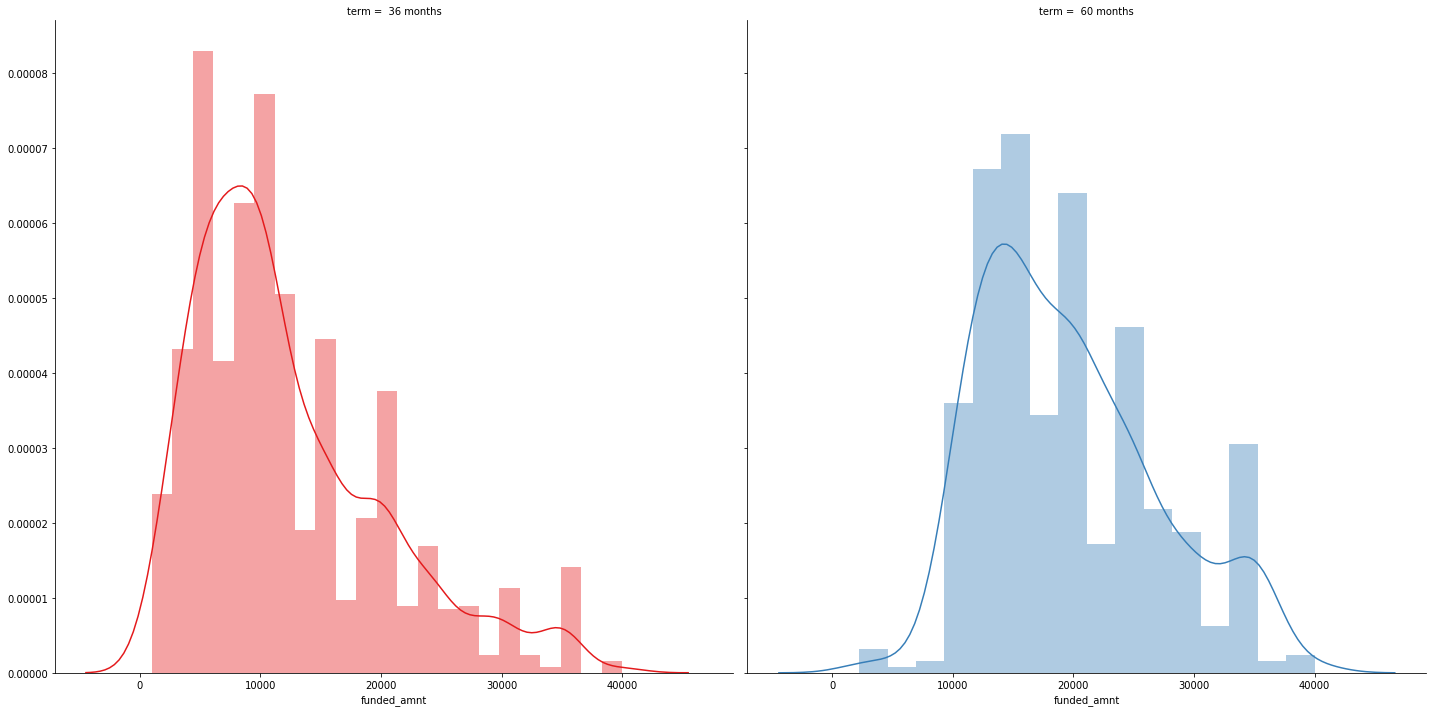

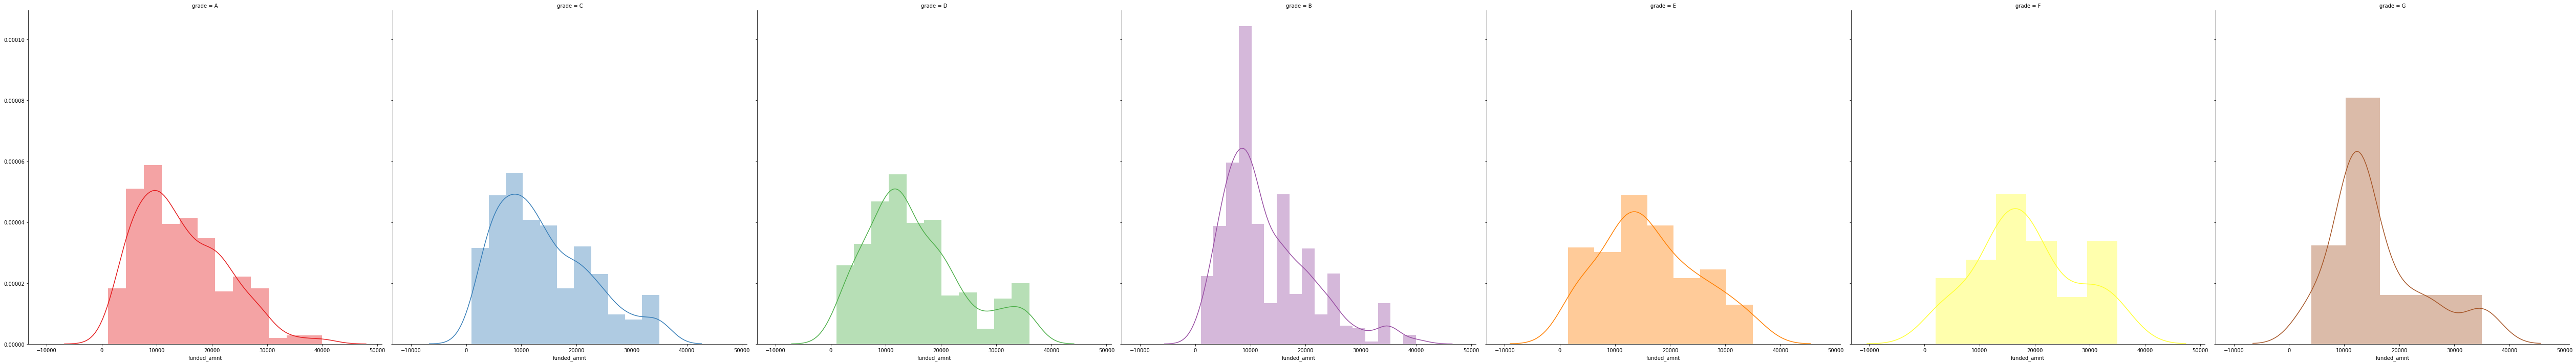

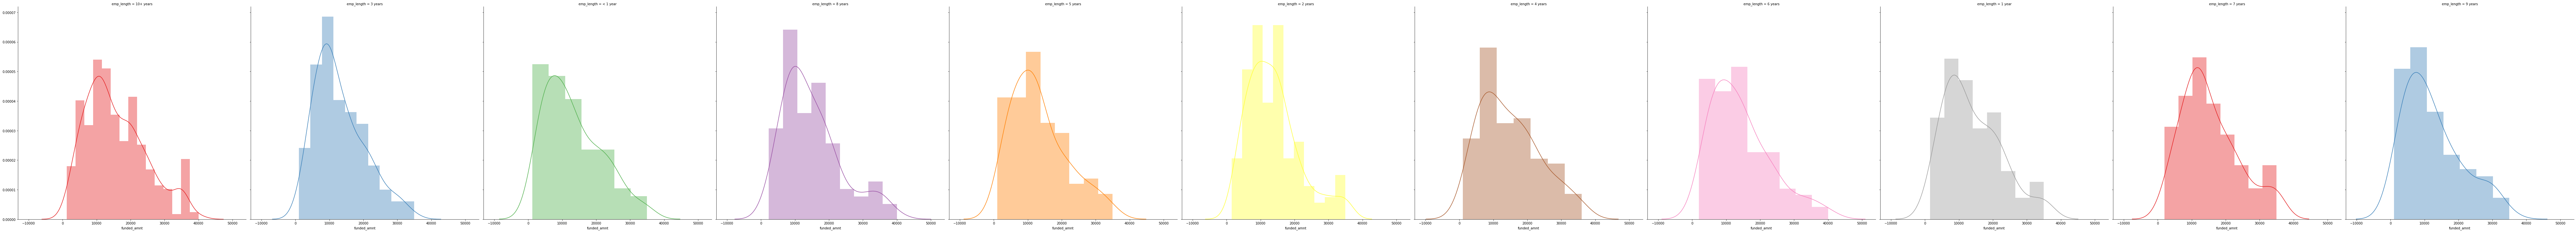

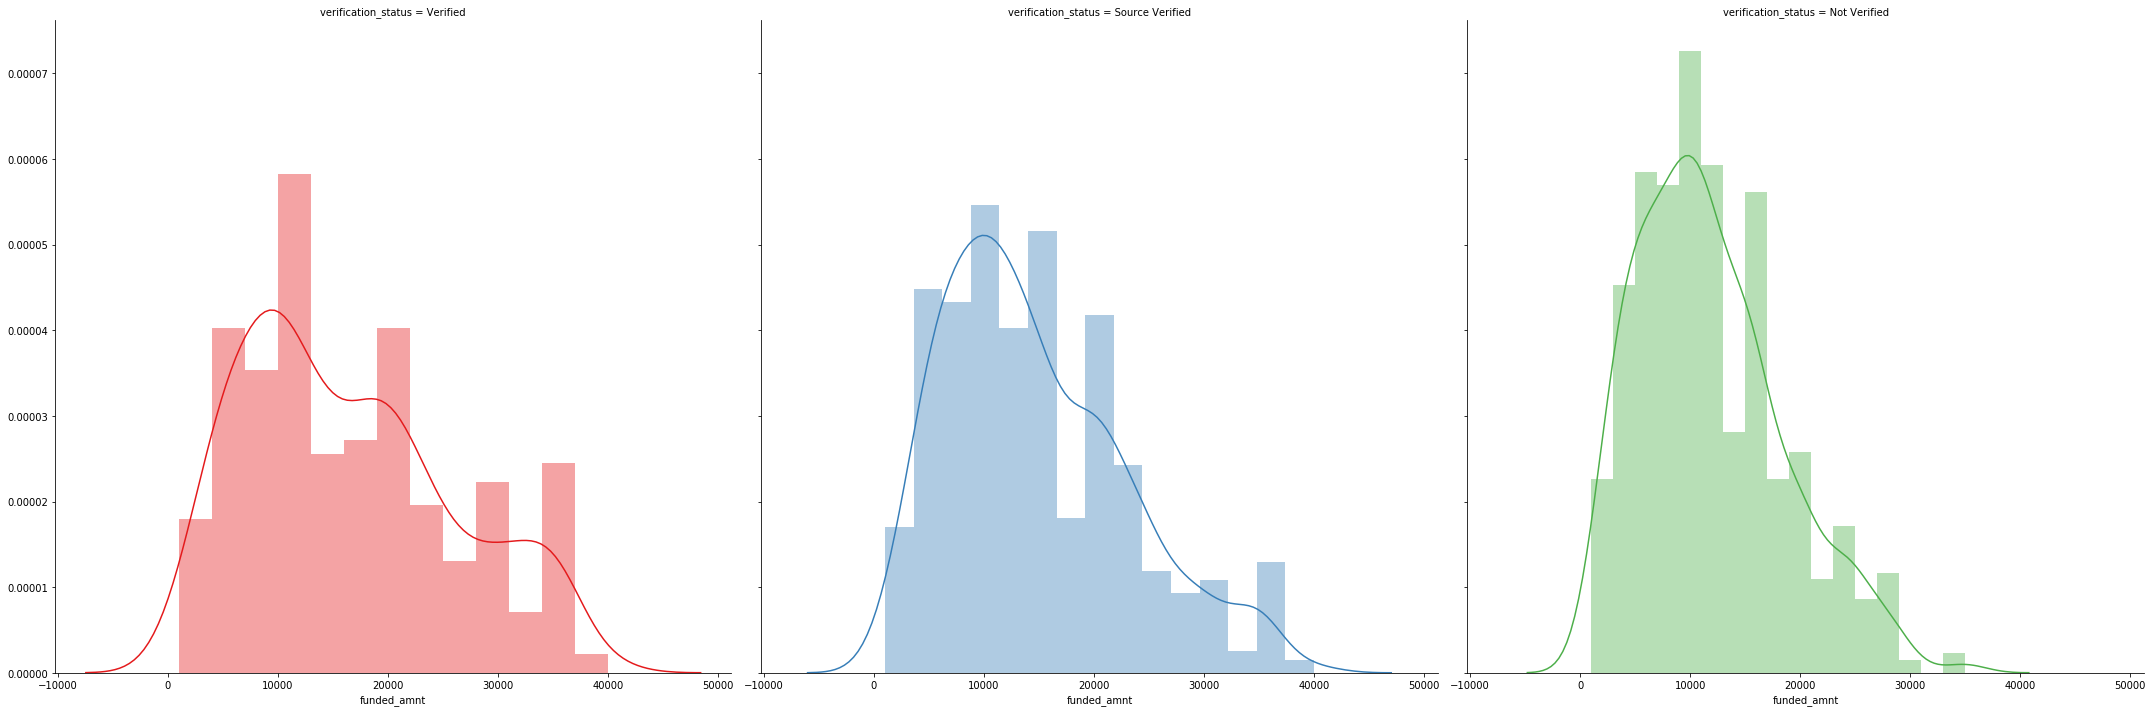

In [49]:
plotlist = ['term','grade','emp_length','verification_status']

for column in plotlist:
    g = sns.FacetGrid(sample_accepted, col=column, hue=column, palette='Set1', size=10)
    g.map(sns.distplot, 'funded_amnt')

In [ ]:
#box plot ordinal/saleprice
plotlist = ['Foundation','MasVnrType','Exterior1st','RoofStyle',
#             'RoofStyle', 'Neighborhood','LandSlope',
#             'LotConfig','Utilities','LotShape','LandContour',
#             'MSZoning','OverallQual','BsmtCond','Alley','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterCond','ExterQual','FireplaceQu','Functional','GarageCond','GarageQual','HeatingQC','KitchenQual','LandSlope','LotShape','PavedDrive','PoolQC',
            'Street']
for column in plotist:
    data = pd.concat([df_raw['SalePrice'], df_raw[column]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=ordinal, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

<p><a name="correlation"></a></p>


## Correlation

In [ ]:
#correlation matrix
corrmat = df_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_raw[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df_raw[cols], size = 5)
plt.show();

In [ ]:
#scatterplot
sns.set()
cols = [ 'OverallQual', 'GrLivArea', 'GarageArea','TotalBsmtSF', 'FullBath','SalePrice']
sns.pairplot(df_raw[cols], size =5)
plt.show();

In [ ]:
#histogram
sns.distplot(df_raw['SalePrice']);

- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

 <p><a name="processing"></a></p>

## Data Processing

- <a href="#domain">1.Domain Knowledge Processing</a><br>
- <a href="#outliers">2.Handling Outliers</a><br>
- <a href="#missing">3.Missing Values</a><br>
- <a href="#transform">4.Feature Transformation </a><br>
- <a href="#numeric">5.Numeric Feature Processing </a><br>

- <a href="#DM">6.Grouping Operations</a><br>
- <a href="#miss">7.Feature Split</a><br>
- <a href="#grouping">8.Scaling</a><br>
- <a href="#grouping">9.Extracting Date</a><br>


In [ ]:
# make a copy so the raw data will not be affected 
df_clean = df_raw.copy()

 <p><a name="domain"></a></p>
 
### Domain Knowledge Processing

In [ ]:
# Combine bathroom quanlitity 
df_clean['BsmtBath'] = df_clean.BsmtFullBath + df_clean.BsmtHalfBath * 0.5
df_clean['Bath'] = df_clean.FullBath + df_clean.HalfBath * 0.5
df_clean = df_clean.drop(['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath'], axis=1)

# drop TotalBsmtSF - multicollinearaty
#df_clean = df_clean.drop(['TotalBsmtSF'], axis=1)

# drop GrLivArea - multicollinearaty
#df_clean = df_clean.drop(['GrLivArea'], axis=1)

# drop GarageArea - 
df_clean = df_clean.drop(['GarageArea'], axis=1) 

# drop MiscFeature 
df_clean = df_clean.drop(['MiscFeature'], axis=1) 

# 

 <p><a name="outliers"></a></p>
 
 ### Handling Outliers 


In [ ]:
# Handling GrLivArea ourliers 

var = 'GrLivArea'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [ ]:
df_raw.sort_values(by = 'GrLivArea', ascending = False)[:2]

In [ ]:
outlier_list = [524, 1299]
df_clean = df_clean.drop(outlier_list)

In [ ]:
#df_clean = df_clean[df_clean.GrLivArea < 4000]
# 

In [ ]:
# hard to fit -- will update after running the model 

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
# Handling TotalBsmtSF ourliers  

df_raw.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'LotArea'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
df_raw.sort_values(by = 'LotArea', ascending = False)[:4]

<p><a name="missing"></a></p>

### Missing Values

In [ ]:
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
df_clean.columns[df_clean.isnull().any()]

In [ ]:
df_clean = df_raw.copy()

In [ ]:
# 259 LotFrontage  - replace missing value with 0 
df_clean["LotFrontage"] = df_clean.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# 1369 Alley - replace with None
df_clean.Alley = df_clean.Alley.fillna('None')

# 8 MasVnrType and MasVnrArea - replace MasVnrType with None and MasVnrArea with 0
df_clean.MasVnrType = df_clean.MasVnrType.fillna('None')
df_clean.MasVnrArea = df_clean.MasVnrArea.fillna(0)

# 37 basement: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2- replace with None
df_clean.BsmtQual = df_clean.BsmtQual.fillna('None')
df_clean.BsmtCond = df_clean.BsmtCond.fillna('None')
df_clean.BsmtExposure = df_clean.BsmtExposure.fillna('None')
df_clean.BsmtFinType1 = df_clean.BsmtFinType1.fillna('None')
df_clean.BsmtFinType2 = df_clean.BsmtFinType2.fillna('None')



# 690 FireplaceQu - replace with None
df_clean.FireplaceQu = df_clean.FireplaceQu.fillna('None')

# 81 Garage: GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - replace with None and year with 0 
# GarageYrBlt ???
df_clean.GarageType = df_clean.GarageType.fillna('None')
df_clean.GarageFinish = df_clean.GarageFinish.fillna('None')
df_clean.GarageQual = df_clean.GarageQual.fillna('None')
df_clean.GarageCond = df_clean.GarageCond.fillna('None')
df_clean.GarageYrBlt = df_clean.GarageYrBlt.fillna(0)

# 1453 PoolQC - replace with None
df_clean.PoolQC = df_clean.PoolQC.fillna('None')

# 1179 Fence - replace with Nf
df_clean.Fence = df_clean.Fence.fillna('None')

# 1406 MiscFeature - replace with None    
#df_clean.MiscFeature = df_clean.MiscFeature.fillna('None')

# 1 Electrical
df_clean = df_clean[pd.notnull(df_clean.Electrical)]

## missing value only in the test set 
# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
df_clean['MSZoning'] = df_clean['MSZoning'].fillna(df_clean['MSZoning'].mode()[0])

# Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_clean.drop(['Utilities'], axis=1,inplace=True)

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_clean['Exterior1st'] = df_clean['Exterior1st'].fillna(df_clean['Exterior1st'].mode()[0])
df_clean['Exterior2nd'] = df_clean['Exterior2nd'].fillna(df_clean['Exterior2nd'].mode()[0])

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtBath'):
    df_clean[col] = df_clean[col].fillna(0)    

#Garage Cars 
df_clean.GarageCars = df_clean.GarageCars.fillna(0)

# SaleType : Fill in again with most frequent which is "WD"
df_clean['SaleType'] = df_clean['SaleType'].fillna(df_clean['SaleType'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_clean['KitchenQual'] = df_clean['KitchenQual'].fillna(df_clean['KitchenQual'].mode()[0])

# Functional : data description says NA means typical
df_clean["Functional"] = df_clean["Functional"].fillna("Typ")  

In [ ]:
# np.sum(df_clean.isnull())

<p><a name="transform"></a></p>

### Feature Transformation 

In [ ]:
df_clean.SalePrice = np.log(df_clean.SalePrice)
df_clean.GrLivArea = np.log(df_clean.GrLivArea)
#df_clean.TotalBsmtSF = np.log(df_clean.TotalBsmtSF)
# after processing missing value 

In [ ]:
#histogram and normal probability plot
sns.distplot(df_raw['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['SalePrice'], plot=plt)

print("Skewness: %f" % df_raw['SalePrice'].skew())
print("Kurtosis: %f" % df_raw['SalePrice'].kurt())

In [ ]:
#histogram and normal probability plot
sns.distplot(df_clean['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['SalePrice'], plot=plt)

print("Skewness: %f" % df_clean['SalePrice'].skew())
print("Kurtosis: %f" % df_clean['SalePrice'].kurt())

In [ ]:
#histogram and normal probability plot
sns.distplot(df_raw['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['GrLivArea'], plot=plt)

print("Skewness: %f" % df_raw['GrLivArea'].skew())
print("Kurtosis: %f" % df_raw['GrLivArea'].kurt())

In [ ]:
#histogram and normal probability plot
sns.distplot(df_clean['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_clean['GrLivArea'], plot=plt)

print("Skewness: %f" % df_clean['GrLivArea'].skew())
print("Kurtosis: %f" % df_clean['GrLivArea'].kurt())

In [ ]:
#histogram and normal probability plot
sns.distplot(df_raw['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_raw['TotalBsmtSF'], plot=plt)

print("Skewness: %f" % df_raw['TotalBsmtSF'].skew())
print("Kurtosis: %f" % df_raw['TotalBsmtSF'].kurt())

# sns.distplot(df_clean['TotalBsmtSF'], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_clean['TotalBsmtSF'], plot=plt)

# print("Skewness: %f" % df_clean['TotalBsmtSF'].skew())
# print("Kurtosis: %f" % df_clean['TotalBsmtSF'].kurt())

<p><a name="numeric"></a></p>

### Numeric Feature Processing 

- scaler 
- normalization 


In [ ]:
var = 'YearBuilt'
data = pd.concat([df_raw['SalePrice'], df_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

  
 
 ###  Categorical Features Processsing

In [ ]:
#box plot ordinal/saleprice
ord_list = ['Foundation','MasVnrType','Exterior1st','RoofStyle',
#             'RoofStyle', 'Neighborhood','LandSlope',
#             'LotConfig','Utilities','LotShape','LandContour',
#             'MSZoning','OverallQual','BsmtCond','Alley','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterCond','ExterQual','FireplaceQu','Functional','GarageCond','GarageQual','HeatingQC','KitchenQual','LandSlope','LotShape','PavedDrive','PoolQC',
            'Street']
for ordinal in ord_list:
    data = pd.concat([df_raw['SalePrice'], df_raw[ordinal]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=ordinal, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    

In [ ]:
# Neighborhood
df = df_clean[['SalePrice', 'GrLivArea', 'Neighborhood']]
df['UnitPrice'] = df_clean.SalePrice / df_clean.GrLivArea
df.groupby(['Neighborhood'])['UnitPrice'].agg({"UnitPrice":"mean"}).sort_values(['UnitPrice'])


In [ ]:
 #Encode some categorical features as ordered numbers when there is information in the order.
df_clean = df_clean.replace({"Alley" : {"None":0,"Grvl" : 1, "Pave" : 2},
                   "Neighborhood" : {"SWISU" : 1, "IDOTRR" : 2, "OldTown" : 3, "BrDale" : 4, "Blueste": 5,
                   "Edwards" : 6, "MeadowV" : 7, "BrkSide" : 8, "NWAmes" : 9, "NAmes" : 10, "NPkVill" : 11, "Sawyer" : 12, "Gilbert": 13, 
                   "SawyerW" : 14, "Crawfor" : 15, "ClearCr" : 16, "Mitchel" : 17, "NoRidge": 18, "Blmngtn" : 19, "CollgCr" : 20, "Timber" : 21, "Somerst" : 22, "Veenker": 23, "NridgHt" : 24, "StoneBr": 25 },
                   "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "BsmtExposure" : {"None" : 0,"No":1, "Mn" : 2, "Av": 3, "Gd" : 4},
                   "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                     "ALQ" : 5, "GLQ" : 6},
                   "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                     "ALQ" : 5, "GLQ" : 6},
                   "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                   "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                   "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                   "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                   "Min2" : 6, "Min1" : 7, "Typ" : 8},
                   "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                   "LandSlope" : {"Sev" : 3, "Mod" : 2, "Gtl" : 1},
                   "LotShape" : {"IR3" : 4, "IR2" : 3, "IR1" : 2, "Reg" : 1},
                   "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                   "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                   "Street" : {"Grvl" : 1, "Pave" : 2}})

In [ ]:
# MSSubClass processing - MSSubClass 20-90 contains only duplicate information with HouseStyle and YearBuilt
# replace with 0 
'''
20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

HouseStyle: Style of dwelling
       
       1Story One story
       1.5Fin One and one-half story: 2nd level finished
       1.5Unf One and one-half story: 2nd level unfinished
       2Story Two story
       2.5Fin Two and one-half story: 2nd level finished
       2.5Unf Two and one-half story: 2nd level unfinished
       SFoyer Split Foyer
       SLvl   Split Level
'''
# df_clean['MSSubClass'] = df_clean['MSSubClass'].replace([20,30,40,45,50,60,70,75,80,85], 0)
df_clean['MSSubClass'] = df_clean['MSSubClass'].replace(['20','30','40','45','50','60','70','75','80','85'], '0')

# convert numerical to categorical 
# df_clean[['MSSubClass','OverallQual','OverallCond']] = df_clean[['MSSubClass','OverallQual','OverallCond']].astype(str)
df_clean['MSSubClass'] = df_clean['MSSubClass'].astype(str)




# ordinal_list = ['OverallQual','OverallCond','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageQual','PoolQC']

# enc = OrdinalEncoder()
# df_clean[ordinal_list] = enc.fit(df_clean[ordinal_list])

# OverallQual
# OverallCond
# ExterCond
# BsmtQual
# BsmtCond
# HeatingQC
# KitchenQual
# Functional
# FireplaceQu
# GarageQual
# PoolQC


## dummies 
df_clean = pd.get_dummies(df_clean, columns=df_clean.select_dtypes(include=['object']).columns, drop_first=True)



In [ ]:
# df_clean.select_dtypes(include=['object']).columns

In [ ]:
# df_clean.dtypes

In [ ]:
# df_clean.select_dtypes(include=['object'])

In [ ]:
df_clean.sample(20)